In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_csv = pd.read_csv('/opt/ml/code/input/train.csv')

In [8]:
train_csv.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50


In [4]:
cluster_res = pd.read_csv('./cluster_res.csv')

In [5]:
cluster_res.head()

,prod_id,prod_name,cluster_id
0,22084,PAPER CHAIN KIT EMPIRE,3
1,21792,CLASSIC FRENCH STYLE BASKET GREEN,1
2,22960,JAM MAKING SET WITH JARS,3
3,22722,SET OF 6 SPICE TINS PANTRY DESIGN,3
4,22652,TRAVEL SEWING KIT,3


In [11]:
prod_to_cluster = {}

for zip_out in zip(cluster_res.prod_id, cluster_res.cluster_id):
    prod_to_cluster[str(zip_out[0])] = zip_out[1]

In [12]:
check_case = ["ADJUST", "ADJUST2", "BANK CHARGES", "C2", "CRUK", "D", "DOT", "M", "PADS", "POST", "SP1002", "TEST001", "TEST002"]

train_csv['unique_prod_id'] = [(str(x[:5]) if len(x)>5 else str(x)) if x not in check_case else x for x in list(train_csv['product_id'][:].copy())]

In [13]:
train_csv.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,unique_prod_id
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61,85048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32,22041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50,21232


In [14]:
for i, ck in enumerate(check_case):
    prod_to_cluster[ck] = i+8

In [15]:
for unique_prod_id in list(set(train_csv.unique_prod_id[:].copy())):
    try:
        cls_id = prod_to_cluster[unique_prod_id]
    except:
        print(unique_prod_id)

In [16]:
train_csv['cluster_id'] = [prod_to_cluster[x] for x in list(train_csv.unique_prod_id[:].copy())]

In [17]:
train_csv.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,unique_prod_id,cluster_id
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61,85048,3
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323,3
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323,3
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32,22041,3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50,21232,3


In [18]:
train_csv['y_m'] = [x[:7] for x in train_csv.order_date[:]]

In [19]:
train_csv.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,unique_prod_id,cluster_id,y_m
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61,85048,3,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323,3,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65,79323,3,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32,22041,3,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50,21232,3,2009-12


In [20]:
time_cluster_grouped = train_csv.groupby(['cluster_id', 'y_m'])[['total', 'quantity']].sum()

In [21]:
time_cluster_grouped

total  quantity
cluster_id y_m                           
1          2009-12  191733.6300     90392
           2010-01  157333.6545    115527
           2010-02  120685.9170    102527
           2010-03  167183.4450    121788
           2010-04  109703.0220     45575
...                         ...       ...
19         2010-01     148.5000        20
           2010-02       0.0000        10
           2010-04      37.1250         5
           2010-10     -37.1250        -5
20         2009-12       1.6500         1

[309 rows x 2 columns]

In [29]:
time_cluster_grouped.xs(1).xs('2009-12')

total       191733.63
quantity     90392.00
Name: 2009-12, dtype: float64

In [25]:
base_idx = list(time_cluster_grouped.xs(1).index[:])
base_idx

['2009-12',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11']

In [45]:
cluster_timeseries = [[] for _ in range(20)]

In [46]:
for i in range(1, 21):
    cluster_df = time_cluster_grouped.xs(i)
    for y_m_idx in base_idx:
        try:
            item_added = cluster_df.xs(y_m_idx)[:]['total']
            cluster_timeseries[i-1].append(item_added)
        except:
            cluster_timeseries[i-1].append(0)

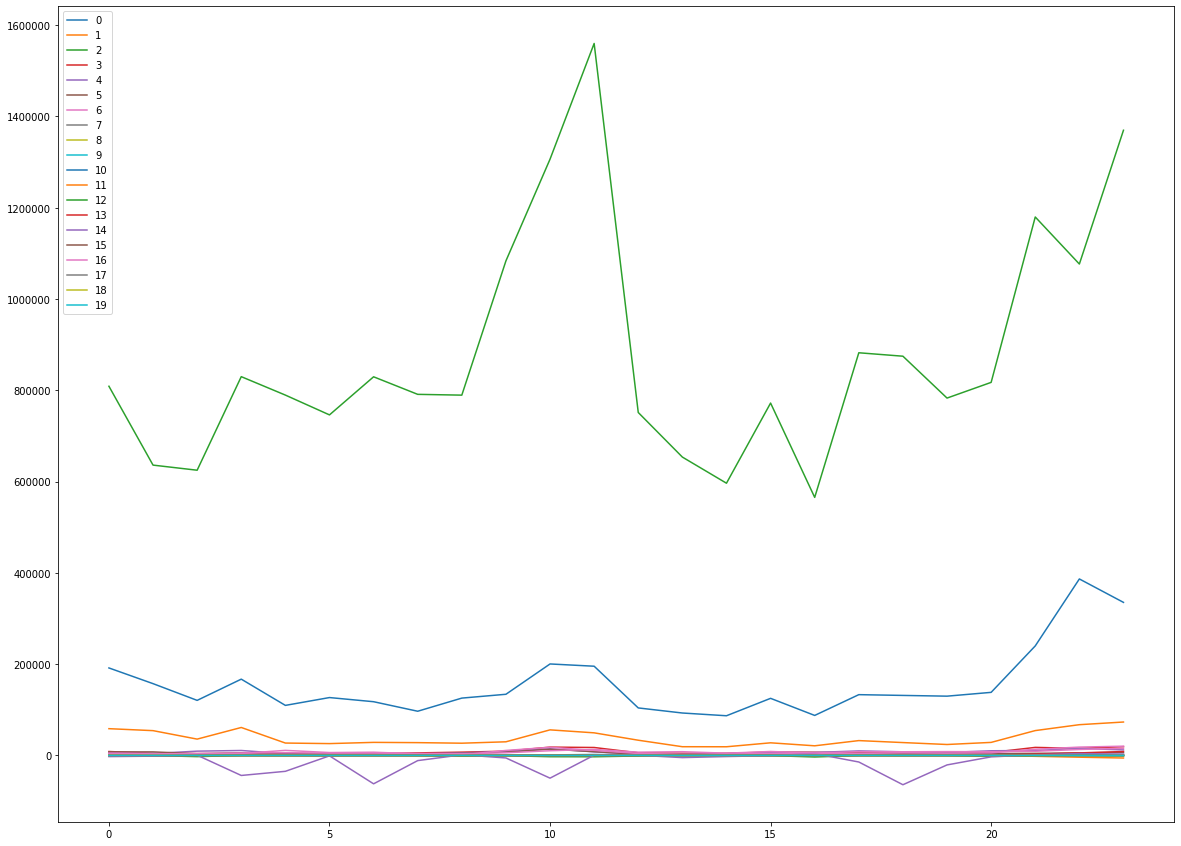

In [60]:
plt.figure(figsize=(20, 15))

for i in range(20):
    plt.plot(range(24), cluster_timeseries[i], label=str(i))
plt.legend()
plt.show()

In [55]:
for k, v in prod_to_cluster.items():
    if v in [12, 13, 15, 16]:
        print(f"cluster {v}: {k}")

cluster 12: CRUK
cluster 13: D
cluster 15: M
cluster 16: PADS


In [54]:
for i in range(1, 21):
    if time_cluster_grouped.xs(i)['total'].sum()<0:
        print(i)

12
13
15
16


In [56]:
time_cluster_grouped.xs(12)['total']

y_m
2011-08      -2.6400
2011-09   -1876.7595
2011-10   -3796.0395
2011-11   -5598.9945
Name: total, dtype: float64

In [57]:
time_cluster_grouped.xs(13)['total']

y_m
2009-12    -179.7015
2010-01    -357.6870
2010-02   -2491.0050
2010-03    -153.0705
2010-04    -324.1920
2010-05      89.0835
2010-06    -561.1650
2010-07    -383.0475
2010-08   -1247.0040
2010-09    -524.5515
2010-10   -2716.5765
2010-11   -2848.1310
2010-12   -1145.0670
2011-01     -37.9005
2011-02    -470.2335
2011-03    -369.9465
2011-04   -3299.3730
2011-05    -155.7930
2011-06    -515.5920
2011-07    -270.6495
2011-08   -1671.5160
2011-09    -539.3355
2011-10     -92.5320
2011-11    -783.5025
Name: total, dtype: float64

In [58]:
time_cluster_grouped.xs(15)['total']

y_m
2009-12    -2484.2070
2010-01    -1528.8405
2010-02      579.4635
2010-03   -43819.9080
2010-04   -34757.0850
2010-05     -872.2395
2010-06   -62141.4585
2010-07   -11275.4400
2010-08     1410.8655
2010-09    -5450.1480
2010-10   -49713.1470
2010-11      575.1900
2010-12      366.1680
2011-01    -4673.4930
2011-02    -2377.7325
2011-03     -523.3140
2011-04     3998.1810
2011-05   -14335.6785
2011-06   -64137.8595
2011-07   -20730.6825
2011-08    -3053.9355
2011-09     1388.2605
2011-10     4219.2480
2011-11     2876.7585
Name: total, dtype: float64

In [59]:
time_cluster_grouped.xs(16)['total']

y_m
2010-01     0.00330
2010-02     0.00990
2010-03     0.00165
2010-04     0.00330
2010-06   -60.39000
2010-09     0.00165
2010-11     0.00330
2011-04     0.00165
2011-07     0.00165
2011-09     0.00165
Name: total, dtype: float64